# PCA for Learning

Because PCA finds the most prominent components out of our feature space, we can use PCA to reduce the dimentionality our data to speed up the training time of our algorithm without losing accuracy as much.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits

In [4]:
X, y = load_digits(return_X_y=True)

In [5]:
X.shape

(1797, 64)

In [6]:
y

array([0, 1, 2, ..., 8, 9, 8])

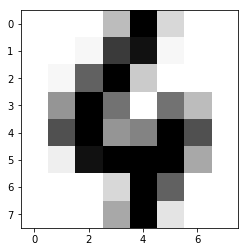

In [18]:
plt.imshow(X[64].reshape(8, 8), cmap='Greys')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.decomposition import PCA

*Parameters*

```n_components : int, float, None or string```

`n_components`

Can be an integer specifying that you are going to get that many components

Can be float between 0,1, meaning how much of the variance you want to account for, for example if it's chosen `0.8`, it will choose as many components until 80% of variance is explained

Lets take 95% of the Variance

In [26]:
pca = PCA(n_components=0.95)

In [27]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

*Transform the train and test data*

In [28]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

Lets use LogisticRegression to predict the numbers

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(lr.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       0.91      1.00      0.95        10
          2       1.00      0.94      0.97        18
          3       0.94      1.00      0.97        16
          4       1.00      1.00      1.00        25
          5       1.00      0.96      0.98        23
          6       1.00      1.00      1.00        19
          7       0.95      1.00      0.97        18
          8       1.00      0.73      0.84        11
          9       0.92      1.00      0.96        23

avg / total       0.97      0.97      0.97       180



We are getting .97 with just using .95 of the variance

In [34]:
lr.score(X_test, y_test)

0.9722222222222222

Using only 40 components out of 64

In [36]:
pca.n_components_

40

Lets train LogisticRegression on different number of Principal Components, and log their accuracy and training time.

In [40]:
import time

In [61]:
data = []
columns = ['Variance', 'Number of Components', 'Train Time', 'Accuracy']

for var in [None, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7]: #None as var in PCA automatically gets all the components
    
    #split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    #scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #pca
    pca = PCA(n_components=var)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    num_components = pca.n_components_
    explained_var = pca.explained_variance_ratio_.sum()
    
    #logisticRegression
    lr = LogisticRegression()
    #calculating fitting time
    start = time.time()
    lr.fit(X_train, y_train)
    train_time = time.time() - start 
    
    accuracy = lr.score(X_test, y_test)
    
    data.append((explained_var, num_components, train_time, accuracy))

results = pd.DataFrame.from_records(data, columns=columns)

I let you analyze the results yourself

In [62]:
results

,Variance,Number of Components,Train Time,Accuracy
0,1.000000,64,0.428217,0.972222
1,0.951253,40,0.254291,0.972222
2,0.901272,31,0.151003,0.950000
3,0.852262,25,0.128234,0.938889
4,0.807793,21,0.103474,0.922222
5,0.763362,18,0.101242,0.944444
6,0.710370,15,0.069742,0.927778


Next session I will talk about this Notebook if you have questions.